## Minimal notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests

import seaborn as sns

from collections import Counter
import itertools

from matplotlib.colors import LogNorm, SymLogNorm, Normalize
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/manuelmorales/miniconda3/envs/training/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import database

db_master is the master dataframe, the complete database from the INSPIREHEP API. Each row represents an author which has published a paper (under 10 authors) under the affiliation of an institution of Latin America, or one of their collaborators. The columns provide various attributes related to their identity and academic contributions.

#### Columns Description:

- **author_id**: A unique identifier for each author, typically combining initials and a numerical suffix.
- **country**: The country associated with the author, potentially where they are based or affiliated.
- **email_addresses**: A list of email addresses associated with the author, sometimes including metadata like the email type (e.g., current).
- **full_name**: The full name of the author, presented in a "Last Name, First Name" format.
- **ids**: A list of identifiers and schemas, likely used to track the author across different academic or institutional databases.
- **institution_id**: A unique identifier for the institution the author is affiliated with.
- **name**: The name of the author, sometimes including a preferred name or additional details.
- **papers**: A list of papers authored by the individual, including citation information such as `recid` (record ID) and publication year.
- **positions**: Information about the author’s academic or professional positions, often including rank and associated records.
- **profile_id**: A unique identifier for the author's profile within a particular academic database or system.
- **advisors**: A list of advisors associated with the author, likely for those in academic programs.
- **gender**: The gender of the author.

This DataFrame is valuable for analyzing academic networks, author contributions, and institutional affiliations, and it may be used to generate insights into patterns in academic publishing across different countries and institutions.

#### Important considerations

- A same author_id can appear multiple times in the database (i.e. more than one row can have the same author_id). This can happen if the author has published under affiliation to different countries, or even within the same country but different institutions. To understand this point better, try `db_master[db_master['author_id'] == 'Daniel.Sudarsky.1']`


In [2]:
# always use False without a local copy
LOCAL = False

if LOCAL:
    f = open('data/inspire_LA.json','r')
    df = json.load(f)
    f.close()
else:
    r = requests.get('https://github.com/restrepo/inspireauth/raw/main/data/inspire_LA.json')
    df = r.json()

db_master = pd.DataFrame(df)
db_master.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
0,H.Albrecht.1,Venezuela,"[{'value': 'hartwig.albrecht@desy.de', 'curren...","Albrecht, Hermann","[{'value': 'H.Albrecht.1', 'schema': 'INSPIRE ...","Unlisted, VE",912061,"{'value': 'Albrecht, Hartwig', 'preferred_name...","[{'recid': 2023395, 'year': '2021', 'citation_...",[{'record': {'$ref': 'https://inspirehep.net/a...,1018731,[],unknown,Hartwig,0.0
1,D.M.B.R.1,Venezuela,None,"Bellorin, David","[{'value': 'D.M.B.R.1', 'schema': 'INSPIRE BAI'}]","Unlisted, VE",912061,"{'value': 'R., David M. Bellorin'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023397,[],male,David Bellorin,1.0
2,D.F.Mundarain.1,Chile,None,"Mundarain, Douglas F.","[{'value': 'D.F.Mundarain.1', 'schema': 'INSPI...",Catolica del Norte U.,908143,"{'value': 'Mundarain, Douglas F.'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023398,[],male,Douglas,1.0
3,R.Gaitan.2,Venezuela,"[{'value': 'rgaitan@uc.edu.ve', 'current': Fal...","Dominguez, Yessica","[{'value': 'R.Gaitan.2', 'schema': 'INSPIRE BA...","Unlisted, VE",912061,"{'value': 'Gaitan, Rolando', 'preferred_name':...","[{'recid': 1863076, 'year': '2021', 'citation_...","[{'rank': 'PHD', 'record': {'$ref': 'https://i...",1864347,[],male,Rolando,1.0
4,J.Ntahompagaze.1,Rwanda,None,"Ntahompagaze, Joseph","[{'value': 'J.Ntahompagaze.1', 'schema': 'INSP...","EAIFR, Kigali",1636656,"{'value': 'Ntahompagaze, Joseph'}","[{'recid': 2087212, 'year': '2022', 'citation_...",None,2087213,[],male,Joseph,1.0


# All countries in the database

In [3]:
# find all countries in json
all_countries = db_master['country'].unique()
# get rid of Nonetypes in the database
all_countries = [country for country in all_countries if country is not None]
# sort countries 
all_countries.sort()

print(len(all_countries))

for country in all_countries:
    print(country)
    
# format country 
def format_country(country):
    country = country.lower()
    ans = country.replace(" ", "_")
    return ans

115
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei Darussalam
Bulgaria
Canada
Chile
China
Colombia
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Georgia
Germany
Ghana
Greece
Guatemala
Holy See (Vatican City State)
Honduras
Hungary
Iceland
India
Indonesia
Iran, Islamic Republic of
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Korea, Republic of
Kuwait
Kyrgyzstan
Latvia
Lebanon
Lithuania
Luxembourg
Madagascar
Malaysia
Malta
Mexico
Moldova
Mongolia
Montenegro
Morocco
Netherlands
New Zealand
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Palestine, State of
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Romania
Russian Federation
Rwanda
Saudi Arabia
Serbia and Montenegro
Singapore
Slovakia
Slovenia
South Africa
Spain
Sri Lanka
Sweden
Switzerland
Syrian Arab Republic
Taiwan

# Latin American countries 

In [4]:
# 19 Latin American countries indexed in the database
LA_countries = [
    'Argentina',
    'Bolivia',
    'Brazil',
    'Chile',
    'Colombia',
    'Costa Rica',
    'Cuba',
    'Dominican Republic', # new
    'Ecuador',
    'El Salvador', # new
    'Guatemala',
    'Honduras',
    'Mexico',
    'Panama', # new
    'Paraguay',
    'Peru',
     #'Puerto Rico', # new
    'Uruguay',
    'Venezuela'
]

# Jamaica, Bahamas not included. 

LA_countries_format = [format_country(country) for country in LA_countries]
print(LA_countries_format)

['argentina', 'bolivia', 'brazil', 'chile', 'colombia', 'costa_rica', 'cuba', 'dominican_republic', 'ecuador', 'el_salvador', 'guatemala', 'honduras', 'mexico', 'panama', 'paraguay', 'peru', 'uruguay', 'venezuela']


# Combined dataframes of number of papers vs year

In [5]:
db_master.head()

,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
0,H.Albrecht.1,Venezuela,"[{'value': 'hartwig.albrecht@desy.de', 'curren...","Albrecht, Hermann","[{'value': 'H.Albrecht.1', 'schema': 'INSPIRE ...","Unlisted, VE",912061,"{'value': 'Albrecht, Hartwig', 'preferred_name...","[{'recid': 2023395, 'year': '2021', 'citation_...",[{'record': {'$ref': 'https://inspirehep.net/a...,1018731,[],unknown,Hartwig,0.0
1,D.M.B.R.1,Venezuela,None,"Bellorin, David","[{'value': 'D.M.B.R.1', 'schema': 'INSPIRE BAI'}]","Unlisted, VE",912061,"{'value': 'R., David M. Bellorin'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023397,[],male,David Bellorin,1.0
2,D.F.Mundarain.1,Chile,None,"Mundarain, Douglas F.","[{'value': 'D.F.Mundarain.1', 'schema': 'INSPI...",Catolica del Norte U.,908143,"{'value': 'Mundarain, Douglas F.'}","[{'recid': 2023395, 'year': '2021', 'citation_...",None,2023398,[],male,Douglas,1.0
3,R.Gaitan.2,Venezuela,"[{'value': 'rgaitan@uc.edu.ve', 'current': Fal...","Dominguez, Yessica","[{'value': 'R.Gaitan.2', 'schema': 'INSPIRE BA...","Unlisted, VE",912061,"{'value': 'Gaitan, Rolando', 'preferred_name':...","[{'recid': 1863076, 'year': '2021', 'citation_...","[{'rank': 'PHD', 'record': {'$ref': 'https://i...",1864347,[],male,Rolando,1.0
4,J.Ntahompagaze.1,Rwanda,None,"Ntahompagaze, Joseph","[{'value': 'J.Ntahompagaze.1', 'schema': 'INSP...","EAIFR, Kigali",1636656,"{'value': 'Ntahompagaze, Joseph'}","[{'recid': 2087212, 'year': '2022', 'citation_...",None,2087213,[],male,Joseph,1.0


In [6]:
db_master[db_master['author_id'] == 'Daniel.Sudarsky.1']


,author_id,country,email_addresses,full_name,ids,institution,institution_id,name,papers,positions,profile_id,advisors,gender,first_names,gender_probability
2380,Daniel.Sudarsky.1,Dominican Republic,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","Santo Domingo, PUCMM",906531,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
2385,Daniel.Sudarsky.1,Dominican Republic,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, D.","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","Santo Domingo, Autonoma U.",907039,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
2387,Daniel.Sudarsky.1,Mexico,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, D.","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...",Mexico U.,903003,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
18803,Daniel.Sudarsky.1,Argentina,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","Buenos Aires, IAFE",904697,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
18849,Daniel.Sudarsky.1,Mexico,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","Mexico U., ICN",904287,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
22615,Daniel.Sudarsky.1,Mexico,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","Mexico U., CEN",908938,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
22933,Daniel.Sudarsky.1,United States,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...",New York U.,903067,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
23071,Daniel.Sudarsky.1,Mexico,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, D.","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...","UNAM, Mexico",908069,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
23298,Daniel.Sudarsky.1,United States,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ', 'schema': 'GOOGLESC...",Penn State U.,903125,"{'value': 'Sudarsky, Daniel', 'name_variants':...","[{'recid': 35032, 'year': '1993', 'citation_co...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...",987260,"[{'ids': [{'value': 'INSPIRE-00081421', 'schem...",male,Daniel,1.0
23744,Daniel.Sudarsky.1,Argentina,"[{'value': 'sudarsky@nucleares.unam.mx', 'curr...","Sudarsky, Daniel","[{'value': 'I4AlvWAAAAAJ',

In [7]:
def generate_dataframe(country: str) -> pd.DataFrame:
    """
    Generate a DataFrame whose rows are all the publications of a given country.
    The `recid` entry is unique for each publication.
    """
    # select column
    db = db_master[db_master['country']==country].reset_index(drop=True)
    
    # obtain list of the institutions of the country
    inst_list = db['institution_id'].drop_duplicates().to_list()
    
    # stack papers and select the ones from the appropriate institutions
    dp = pd.DataFrame(db.papers.apply(pd.Series).stack().to_list()).reset_index(drop=True)
    dp = dp[dp['institution_id'].isin(inst_list)]
    
    # get rid of paper duplicates
    dp = dp.drop_duplicates(subset='recid')
    
    # skip entries without listed `year`. This ignores the papers that do not have year.
    # For this reason, the sum over all years will not equal the total number of publications
    # from the other notebook. In fact, the result here will be less or equal to it. 
    dp = dp[pd.to_numeric(dp['year'], errors='coerce').notnull()].reset_index(drop=True)
    
    # transform to numerical values
    dp['year'] = pd.to_numeric(dp['year'])
    # get rid of old entries
    dp = dp[dp['year'] >= 1900]
    
    # down here we get each year and number of publications, but it now redundant 
    # TODO: remove this
    ## get Series
    #df_country = dp['year'].value_counts().sort_index()
    #df_country = pd.DataFrame({'year': df_country.index, country: df_country.values})
    #return df_country

    return dp


In [8]:
df_chile = generate_dataframe('Chile')
print(f"Are all the entries unique? {df_chile['recid'].is_unique}")
df_chile

Are all the entries unique? True


,recid,year,citation_count,primary_arxiv_category,journal_id,author_id,institution_id,rank,start_date,end_date,institution,country,current
0,2023395,2021,1,[quant-ph],None,D.F.Mundarain.1,908143,NaN,NaN,NaN,NaN,NaN,NaN
1,2068608,2022,0,[quant-ph],None,D.F.Mundarain.1,908143,NaN,NaN,NaN,NaN,NaN,NaN
2,1445015,2019,6,[hep-th],None,M.P.Garcia.del.Moral.1,907784,SENIOR,2017,None,Antofagasta U.,Chile,True
3,1602193,2018,0,[hep-th],1212279,M.P.Garcia.del.Moral.1,907784,JUNIOR,2016,2017,Antofagasta U.,Chile,True
4,1859189,2022,0,[hep-th],1213103,M.P.Garcia.del.Moral.1,907784,SENIOR,2017,None,Antofagasta U.,Chile,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6083,1746297,2020,2,[hep-th],None,R.Rojas.Mejias.1,904828,NaN,NaN,NaN,NaN,NaN,NaN
6084,1748760,2019,0,[],None,E.Vera.3,904828,NaN,NaN,NaN,NaN,NaN,NaN
6085,1829305,2020,6,[gr-qc],None,I.Sakalli.1,904828,NaN,NaN,NaN,NaN,NaN,NaN
6086,1242490,2013,8,[cond-mat.str-el],None,P.Mellado.2,910504,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
min_years = {}

for country in LA_countries:
    min_years[country] = generate_dataframe(country)['year'].min()
    


In [10]:
min_years

{'Argentina': 1960,
 'Bolivia': 1961,
 'Brazil': 1953,
 'Chile': 1959,
 'Colombia': 1966,
 'Costa Rica': 1977,
 'Cuba': 1959,
 'Dominican Republic': 1993,
 'Ecuador': 1989,
 'El Salvador': 1969,
 'Guatemala': 2005,
 'Honduras': 1983,
 'Mexico': 1950,
 'Panama': 1985,
 'Paraguay': 2011,
 'Peru': 1967,
 'Uruguay': 1946,
 'Venezuela': 1967}

In [11]:
# find the first article of each country
df_chile.loc[df_chile['year'] == df_chile['year'].min()]

,recid,year,citation_count,primary_arxiv_category,journal_id,author_id,institution_id,rank,start_date,end_date,institution,country,current
4717,48228,1959,3,[],1213226,H.R.Maturana.1,902731,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# example
generate_dataframe('Dominican Republic')

,recid,year,citation_count,primary_arxiv_category,journal_id,author_id,institution_id,rank,start_date,end_date,current,institution,country
0,35032,1993,51,[gr-qc],None,Daniel.Sudarsky.1,906531,NaN,NaN,NaN,NaN,NaN,NaN
1,373019,1994,0,[],None,Daniel.Sudarsky.1,906531,NaN,NaN,NaN,NaN,NaN,NaN
2,366784,1993,0,[],None,Daniel.Sudarsky.1,907039,NaN,NaN,NaN,NaN,NaN,NaN
3,401209,1995,133,[],1214779,Daniel.Sudarsky.1,907039,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# dictionary to store results
df_latam = {}

for country in LA_countries:
    df_latam[country] = generate_dataframe(country)


In [14]:
df_latam['Chile']

,recid,year,citation_count,primary_arxiv_category,journal_id,author_id,institution_id,rank,start_date,end_date,institution,country,current
0,2023395,2021,1,[quant-ph],None,D.F.Mundarain.1,908143,NaN,NaN,NaN,NaN,NaN,NaN
1,2068608,2022,0,[quant-ph],None,D.F.Mundarain.1,908143,NaN,NaN,NaN,NaN,NaN,NaN
2,1445015,2019,6,[hep-th],None,M.P.Garcia.del.Moral.1,907784,SENIOR,2017,None,Antofagasta U.,Chile,True
3,1602193,2018,0,[hep-th],1212279,M.P.Garcia.del.Moral.1,907784,JUNIOR,2016,2017,Antofagasta U.,Chile,True
4,1859189,2022,0,[hep-th],1213103,M.P.Garcia.del.Moral.1,907784,SENIOR,2017,None,Antofagasta U.,Chile,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6083,1746297,2020,2,[hep-th],None,R.Rojas.Mejias.1,904828,NaN,NaN,NaN,NaN,NaN,NaN
6084,1748760,2019,0,[],None,E.Vera.3,904828,NaN,NaN,NaN,NaN,NaN,NaN
6085,1829305,2020,6,[gr-qc],None,I.Sakalli.1,904828,NaN,NaN,NaN,NaN,NaN,NaN
6086,1242490,2013,8,[cond-mat.str-el],None,P.Mellado.2,910504,NaN,NaN,NaN,NaN,NaN,NaN


# Combined plots

In [15]:
df_chile = df_latam['Chile']
df_argentina = df_latam['Argentina']

In [16]:
df_chile

,recid,year,citation_count,primary_arxiv_category,journal_id,author_id,institution_id,rank,start_date,end_date,institution,country,current
0,2023395,2021,1,[quant-ph],None,D.F.Mundarain.1,908143,NaN,NaN,NaN,NaN,NaN,NaN
1,2068608,2022,0,[quant-ph],None,D.F.Mundarain.1,908143,NaN,NaN,NaN,NaN,NaN,NaN
2,1445015,2019,6,[hep-th],None,M.P.Garcia.del.Moral.1,907784,SENIOR,2017,None,Antofagasta U.,Chile,True
3,1602193,2018,0,[hep-th],1212279,M.P.Garcia.del.Moral.1,907784,JUNIOR,2016,2017,Antofagasta U.,Chile,True
4,1859189,2022,0,[hep-th],1213103,M.P.Garcia.del.Moral.1,907784,SENIOR,2017,None,Antofagasta U.,Chile,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6083,1746297,2020,2,[hep-th],None,R.Rojas.Mejias.1,904828,NaN,NaN,NaN,NaN,NaN,NaN
6084,1748760,2019,0,[],None,E.Vera.3,904828,NaN,NaN,NaN,NaN,NaN,NaN
6085,1829305,2020,6,[gr-qc],None,I.Sakalli.1,904828,NaN,NaN,NaN,NaN,NaN,NaN
6086,1242490,2013,8,[cond-mat.str-el],None,P.Mellado.2,910504,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_argentina

,recid,year,citation_count,primary_arxiv_category,journal_id,author_id,institution_id,rank,start_date,end_date,current,institution,country
0,884148,2011,1,[hep-th],None,F.A.Schaposnik.1,902950,SENIOR,1986,None,True,La Plata U.,Argentina
1,2030209,2022,1,[hep-th],None,F.A.Schaposnik.1,902950,SENIOR,1986,None,True,La Plata U.,Argentina
2,2098035,2022,0,[],1613973,F.A.Schaposnik.1,902950,SENIOR,1986,None,True,La Plata U.,Argentina
3,1372753,2015,8,[hep-th],None,F.A.Schaposnik.1,902950,SENIOR,1986,None,True,La Plata U.,Argentina
4,693926,2005,24,[hep-th],None,F.A.Schaposnik.1,902950,SENIOR,1986,None,True,La Plata U.,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5585,256517,1987,3,[],None,E.H.Fradkin.1,902950,NaN,NaN,NaN,NaN,NaN,NaN
5586,244634,1987,24,[],1214719,R.Vignoni.1,902950,NaN,NaN,NaN,NaN,NaN,NaN
5587,173860,1981,3,[],1214719,C.Carter.2,902950,NaN,NaN,NaN,NaN,NaN,NaN
5588,480815,2000,0,[],1214719,Gustavo.Cancelo.1,902950,NaN,NaN,NaN,NaN,NaN,NaN


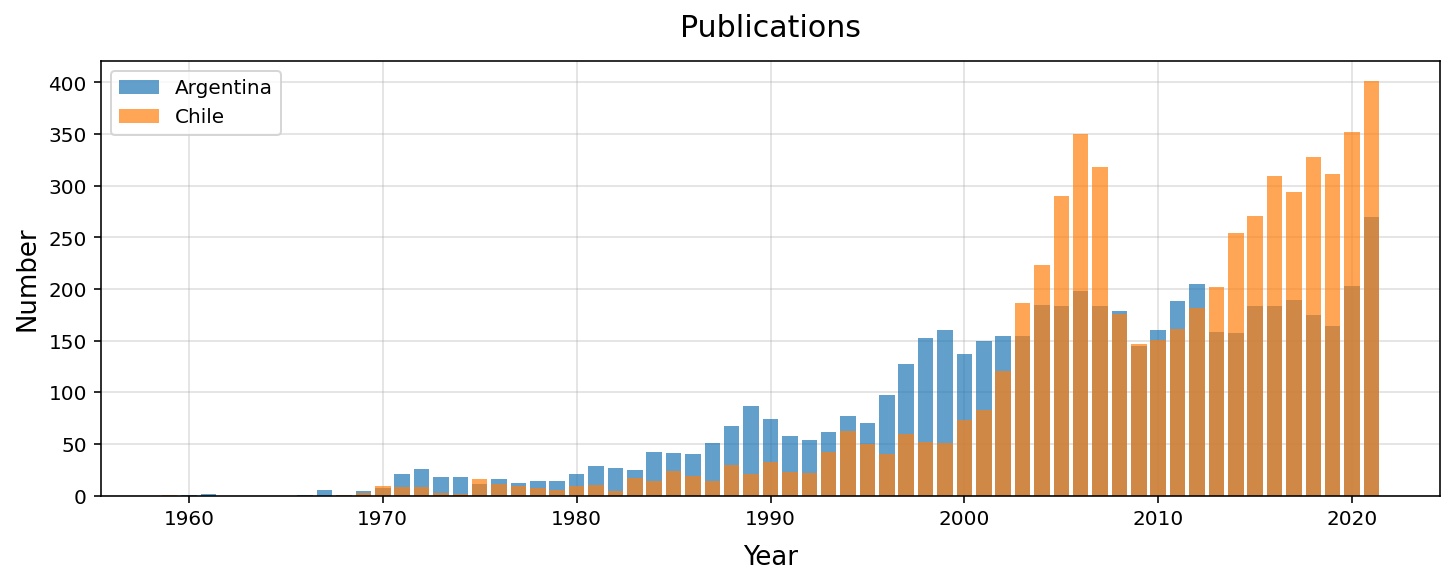

In [18]:
# Plotting function

def plot_combined_papers_per_year(countries, save=False):
    """
    Plots the number of papers published per year for multiple countries.

    Parameters:
    countries (list of str): List of country names as strings.
    """
    # Create an empty DataFrame to hold all data
    combined_df = pd.DataFrame()

    # Combine all DataFrames into one, adding a 'country' column
    for country in countries:
        df = generate_dataframe(country)
        df['country'] = country
        combined_df = pd.concat([combined_df, df])

    # Ensure the 'year' column is numeric
    combined_df = combined_df[pd.to_numeric(combined_df['year'], errors='coerce').notnull()].reset_index(drop=True)
    combined_df['year'] = pd.to_numeric(combined_df['year'])

    # Filter out any papers before 1900 and after 2021
    combined_df = combined_df[(combined_df['year'] >= 1900) & (combined_df['year'] <= 2021)]

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 4))

    # Plot each country's data
    for country, group_df in combined_df.groupby('country'):
        year_counts = group_df['year'].value_counts().sort_index()
        ax.bar(year_counts.index, year_counts.values, width=0.8, label=country, alpha=0.7)

    # Formatting the plot
    ax.set_title('Publications', size=15, pad=12)
    ax.set_xlabel('Year', size=13, labelpad=8)
    ax.set_ylabel('Number', size=13)
    ax.set_axisbelow(True)
    ax.grid(True, alpha=0.4)

    # Ensure the y-axis only shows integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    # Add a legend
    ax.legend()

    # save the figure 
    if save:
        joined_string = '_'.join(countries)
        namefig = f"{joined_string}_plot"
        fig.savefig(f'/Users/manuelmorales/inspireauth/figures/combined_articles_per_year/{namefig}.pdf', dpi=150, bbox_inches = 'tight')

# Example usage
plot_combined_papers_per_year(['Argentina', 'Chile'])


In [19]:
# different combinations

comb_1 = ['Argentina', 'Chile']
comb_2 = ['Mexico', 'Brazil']
comb_3 = ['Venezuela', 'Colombia']
comb_4 = ['Peru', 'Ecuador']
#comb_5 = ['Cuba', 'Uruguay', 'Costa Rica']
comb_5 = ['Cuba', 'Uruguay']
comb_6 = ['Guatemala', 'Bolivia']
comb_7 = ['Paraguay', 'Honduras']
#comb_8 = ['Dominican Republic', 'Puerto Rico'] # new
comb_8 = ['Dominican Republic', 'Costa Rica'] # new
comb_9 = ['Panama', 'El Salvador'] # new

combs = [comb_1, comb_2, comb_3, comb_4, comb_5, comb_6, comb_7, comb_8, comb_9]

In [20]:
def generate_combinations(combs, save=False):
    for comb in combs:
        plot_combined_papers_per_year(comb, save=save)

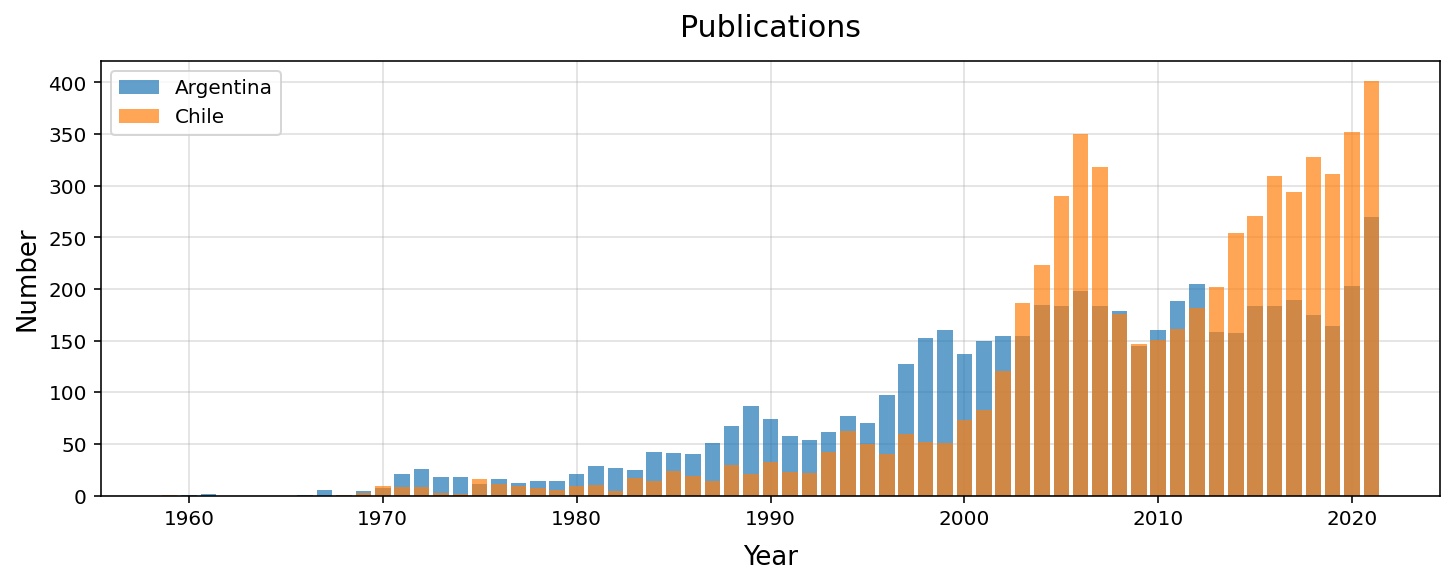

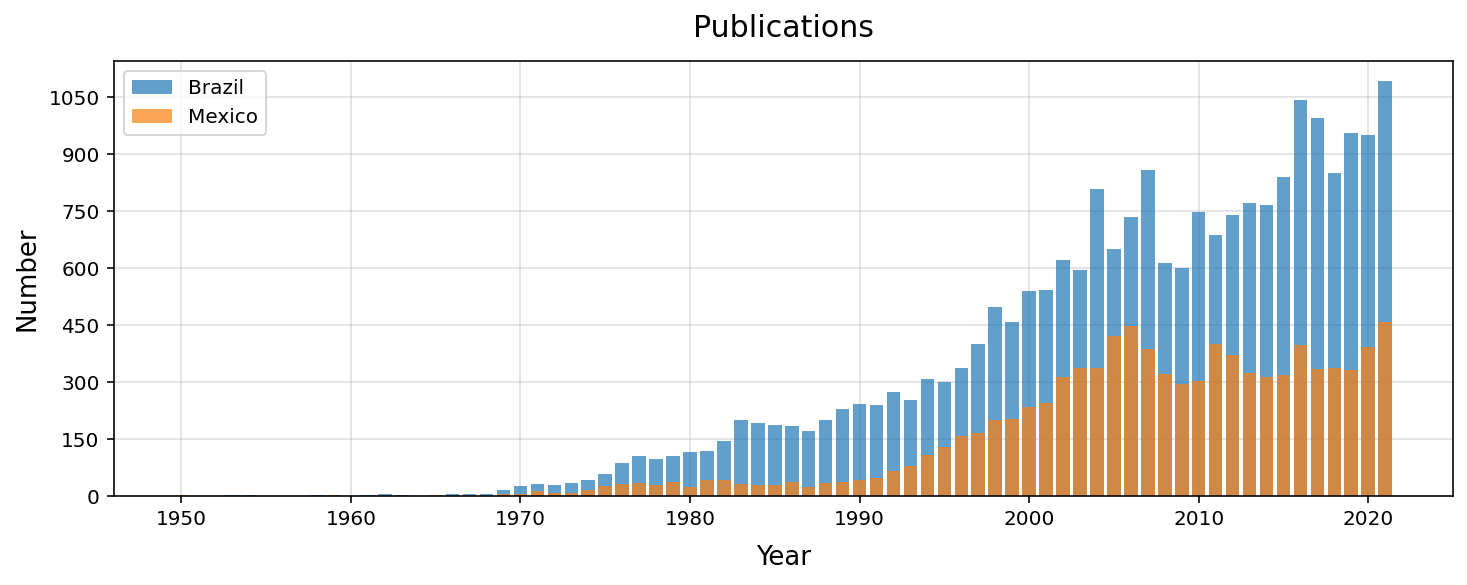

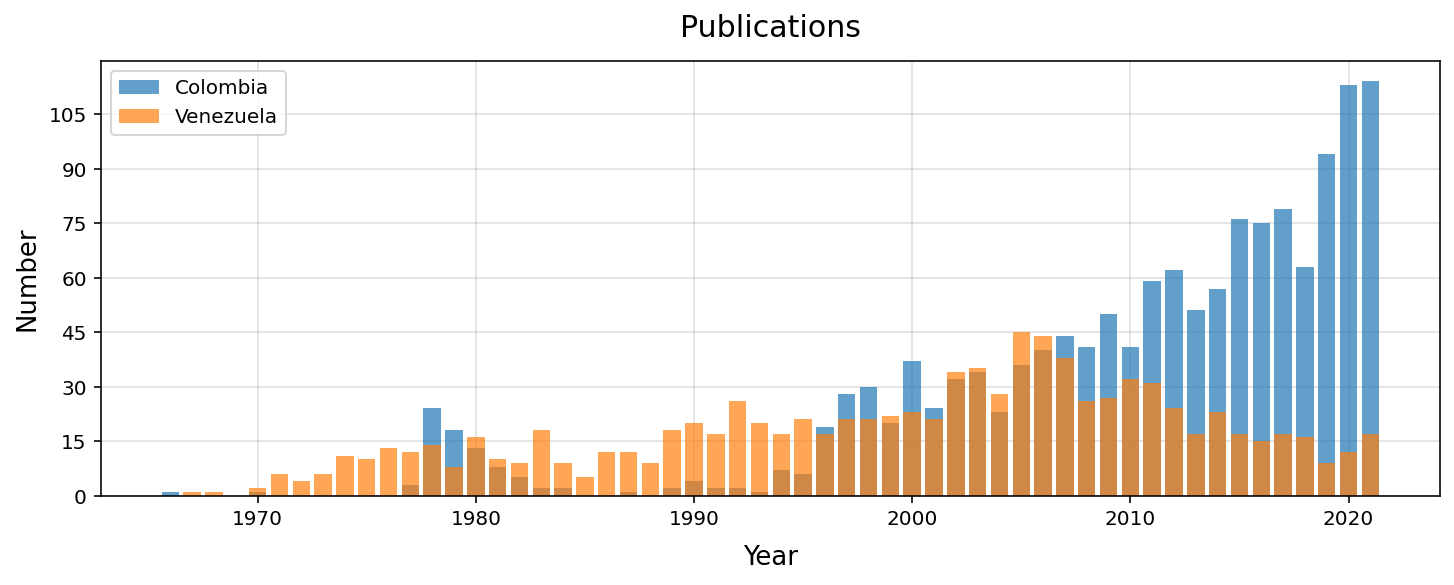

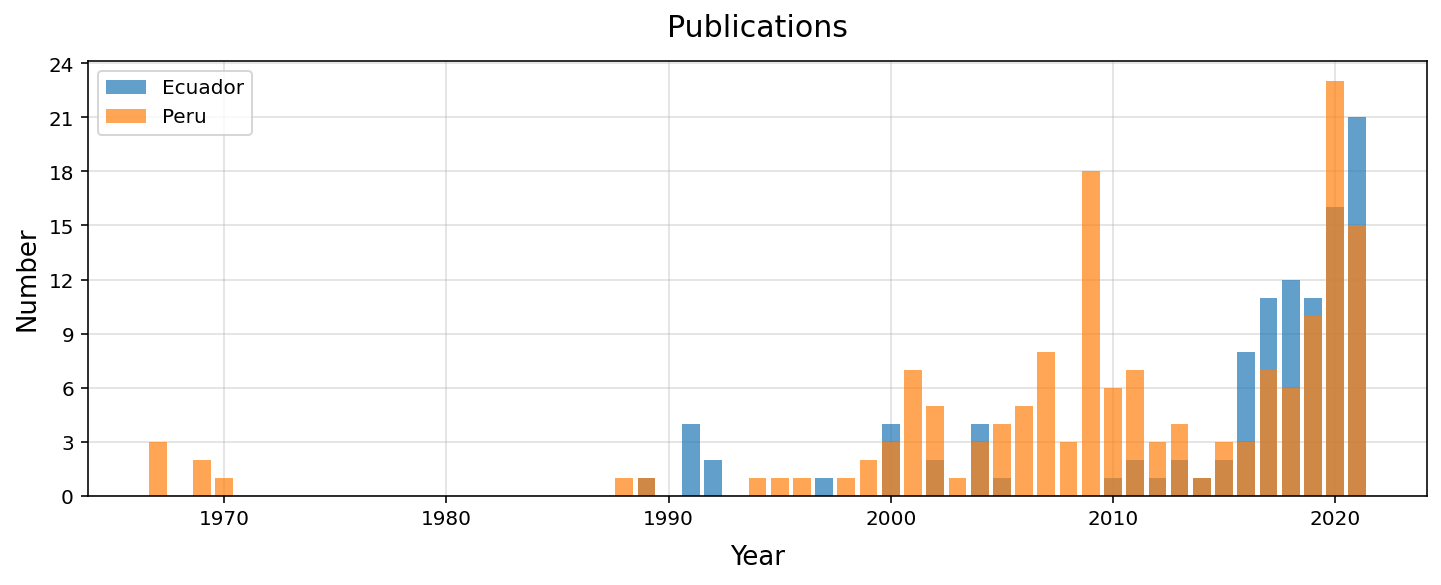

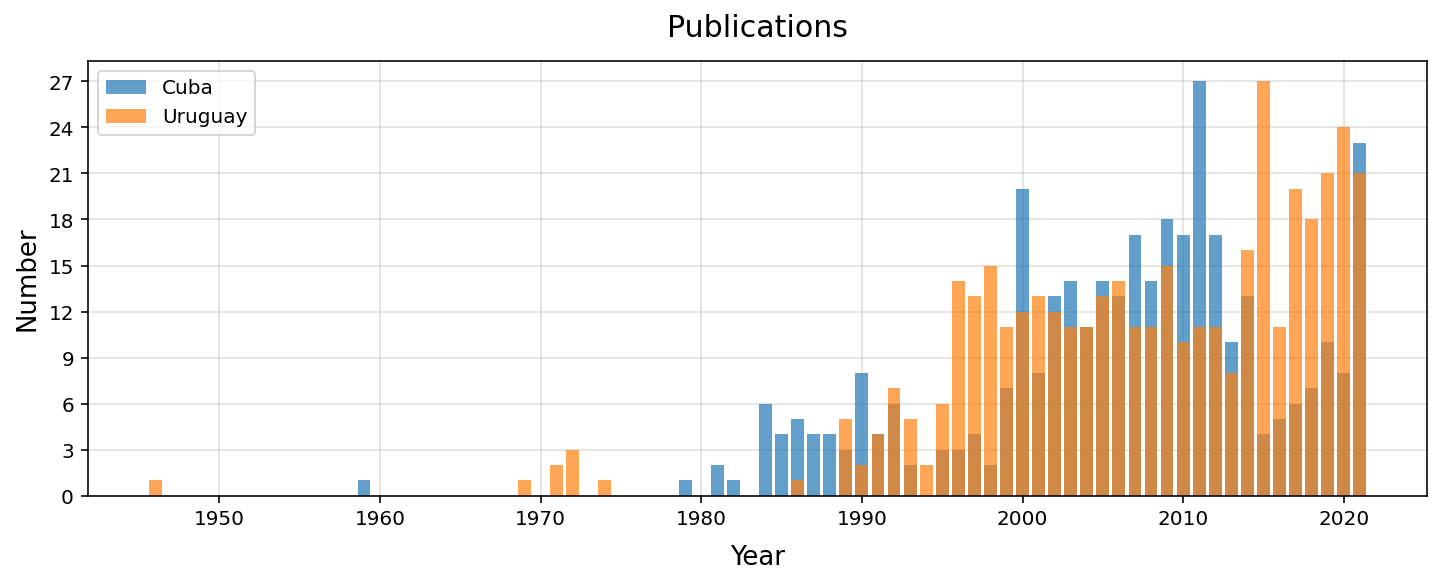

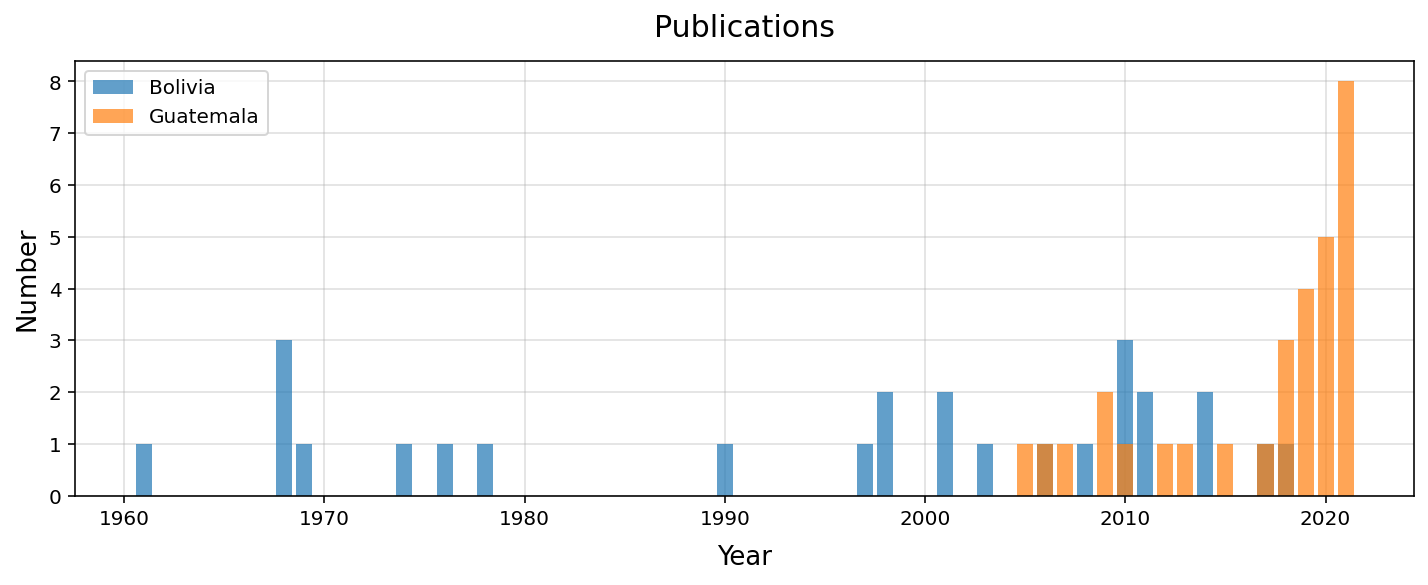

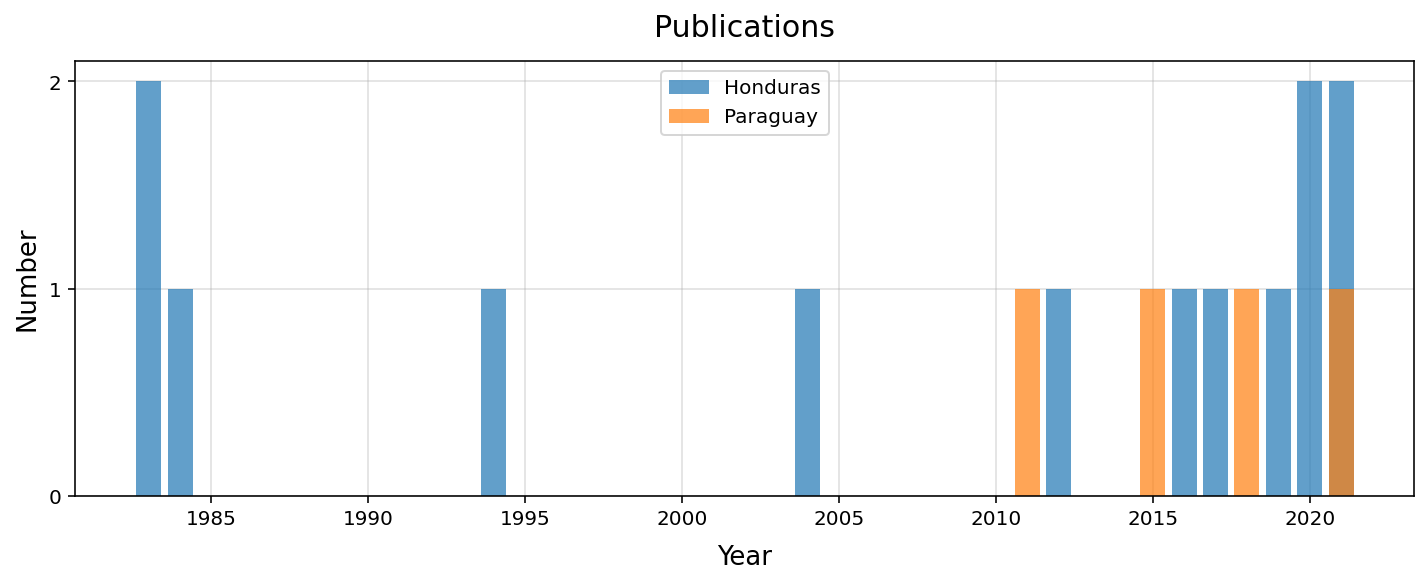

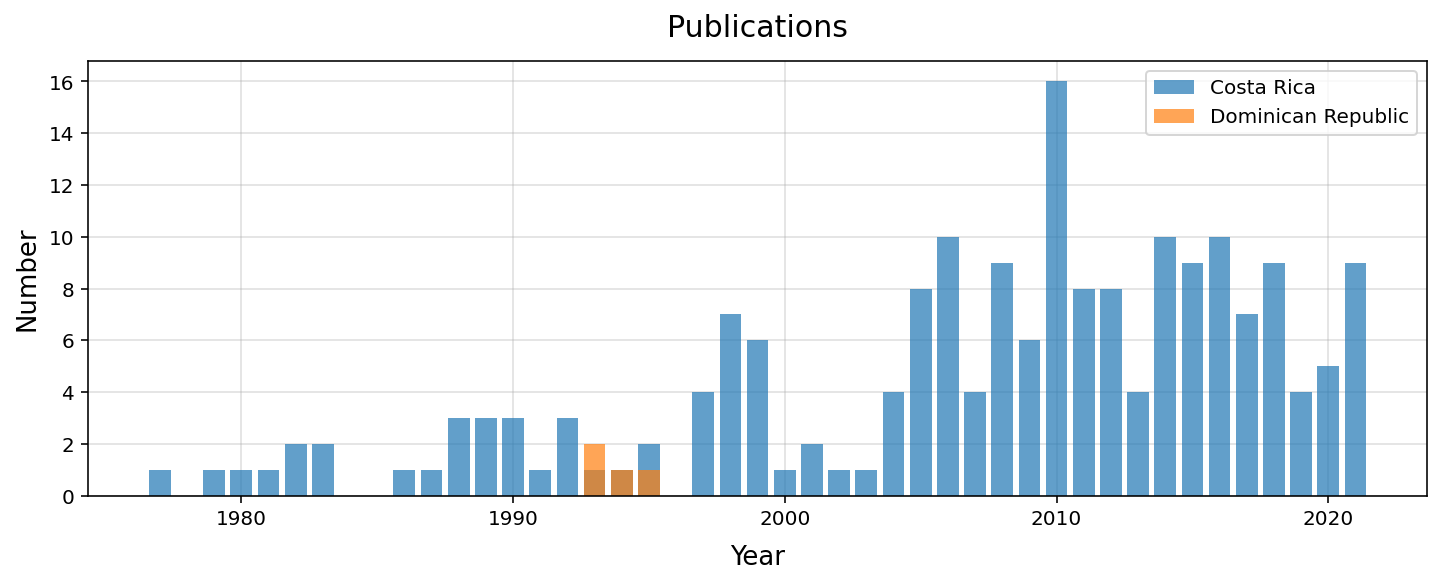

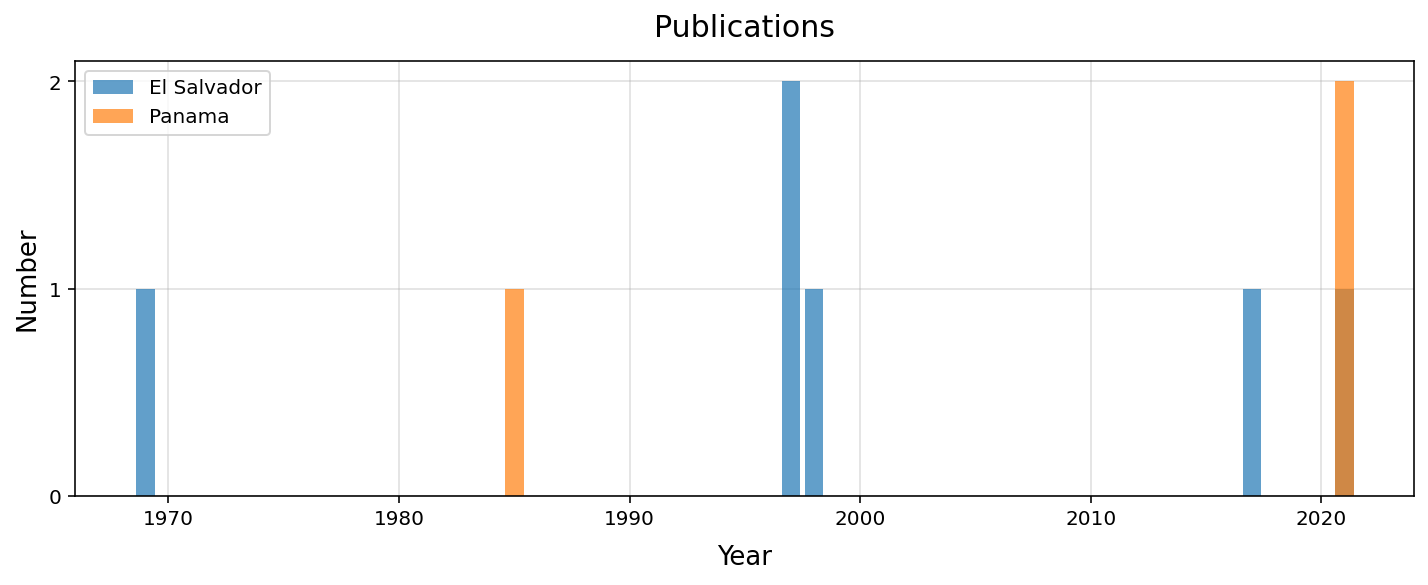

In [22]:
generate_combinations(combs, save=True)

# Individual plots

In [32]:
def plot_articles_per_year(country):
    # Generate the DataFrame for the specified country
    df = generate_dataframe(country)

    # Ensure the 'year' column is numeric and drop rows where 'year' is NaN
    df = df[pd.to_numeric(df['year'], errors='coerce').notnull()].reset_index(drop=True)
    df['year'] = pd.to_numeric(df['year'])

    # Filter out any papers before 1900 (if necessary)
    df = df[df['year'] >= 1900]

    # Create a range of years from the minimum year to 2021
    years_range = range(df['year'].min(), 2022)

    # Count the number of papers published each year
    year_counts = df['year'].value_counts().sort_index()
    year_counts = year_counts.reindex(years_range, fill_value=0)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 3))

    year_counts.plot(kind='bar', ax=ax, width=0.8)

    # Formatting the plot
    ax.set_title(f'Publications of {country}', size=15, pad=12)
    ax.set_xlabel('Year', size=13, labelpad=8)
    ax.set_ylabel('Number', size=13)
    ax.set_axisbelow(True)
    ax.grid(True, alpha=0.4)

    # Ensure the y-axis only shows integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    # Show the plot
    plt.show()

    # Optional: Save the plot as a PDF
    namefig = f"articles_{country}_per_year"
    fig.savefig(f'/Users/manuelmorales/inspireauth/figures/individual_articles_per_year/{namefig}.pdf', dpi=150, bbox_inches='tight')


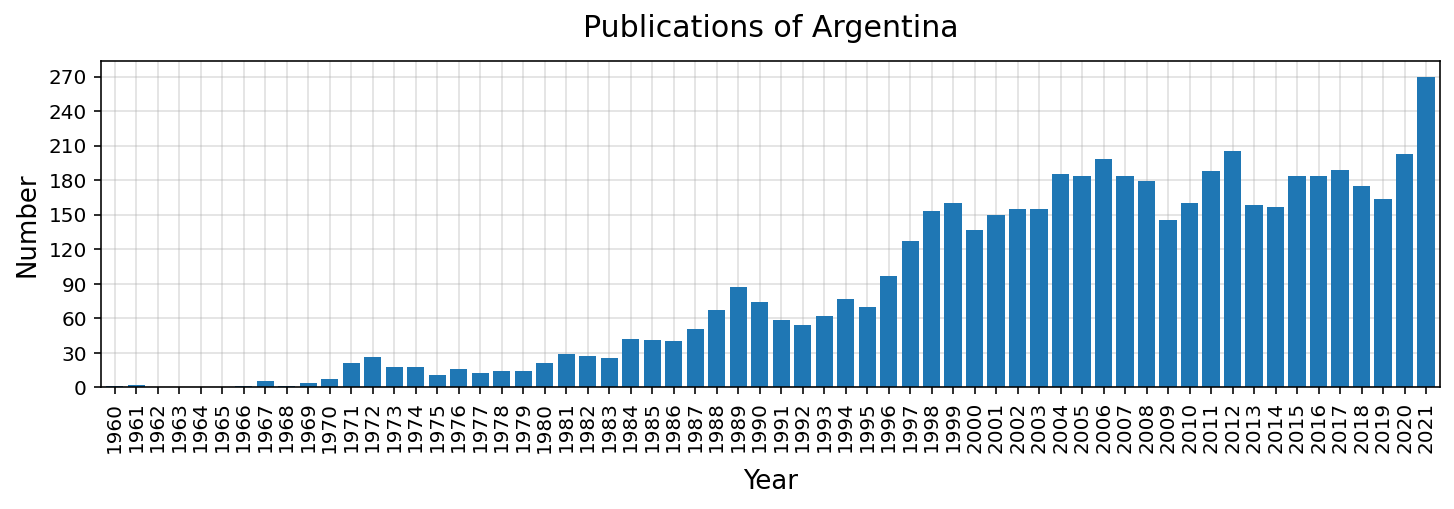

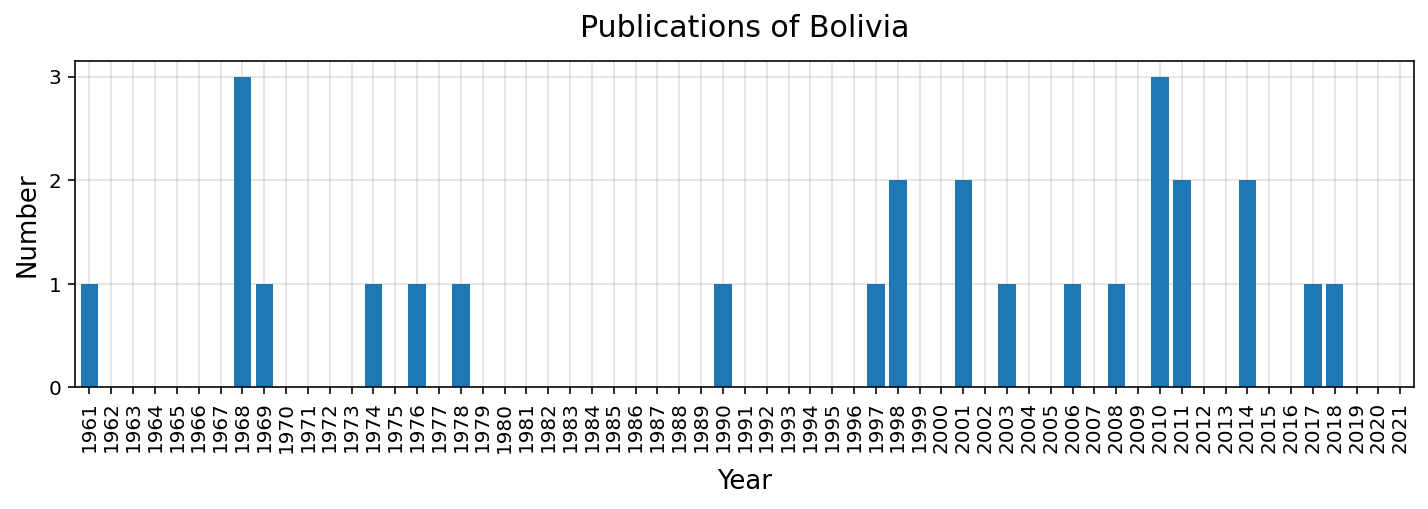

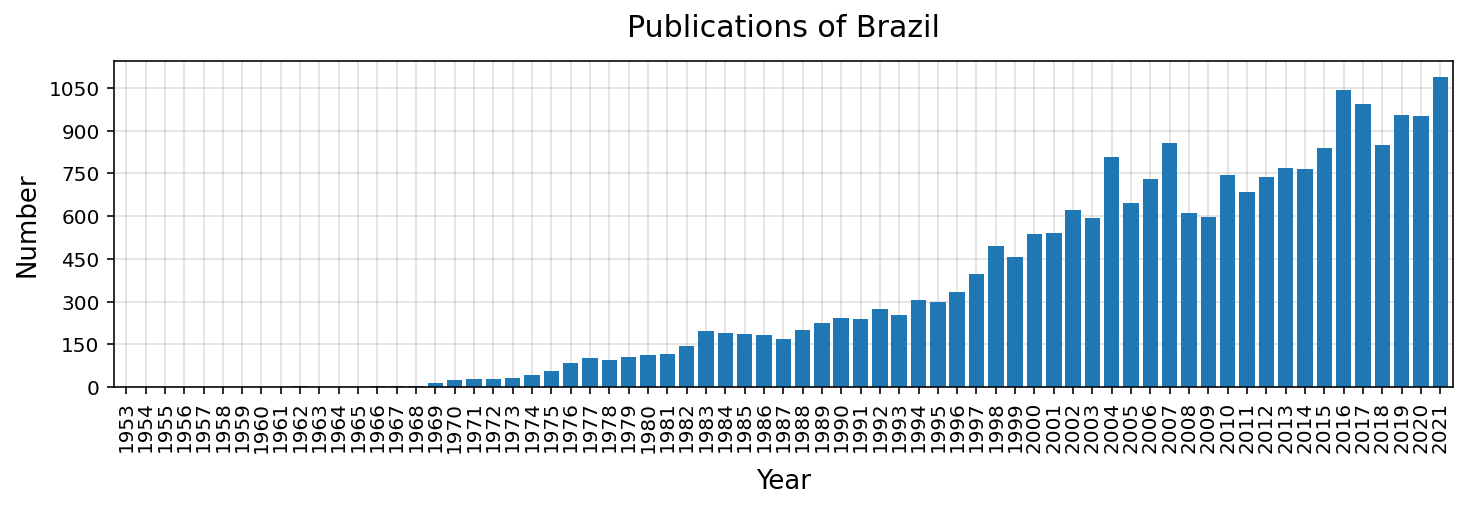

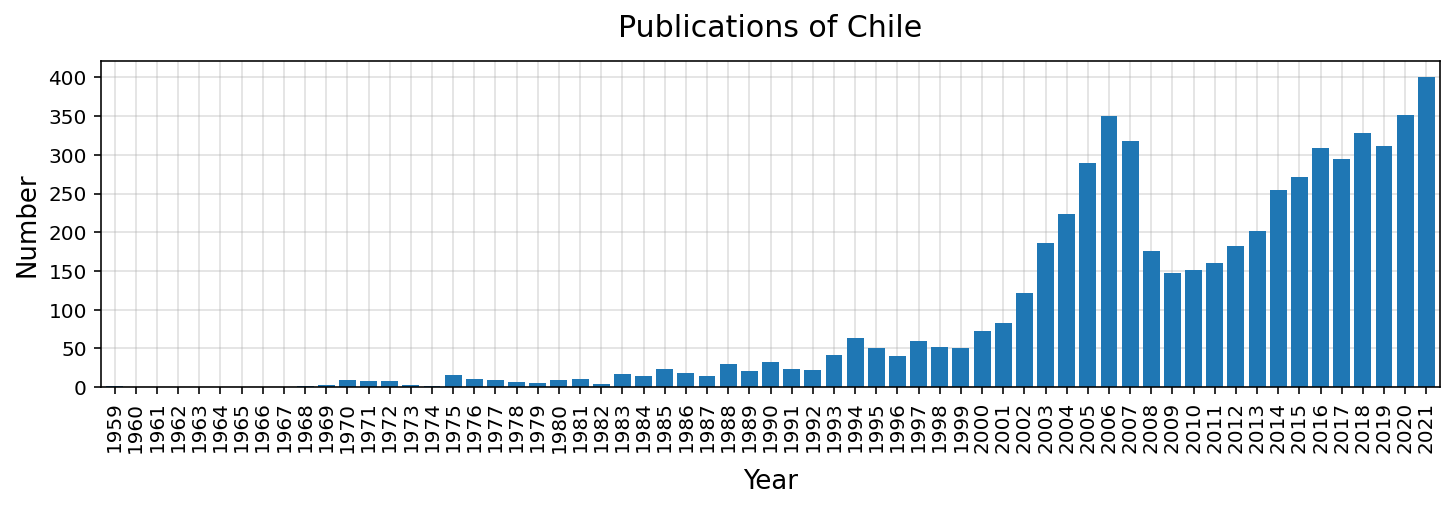

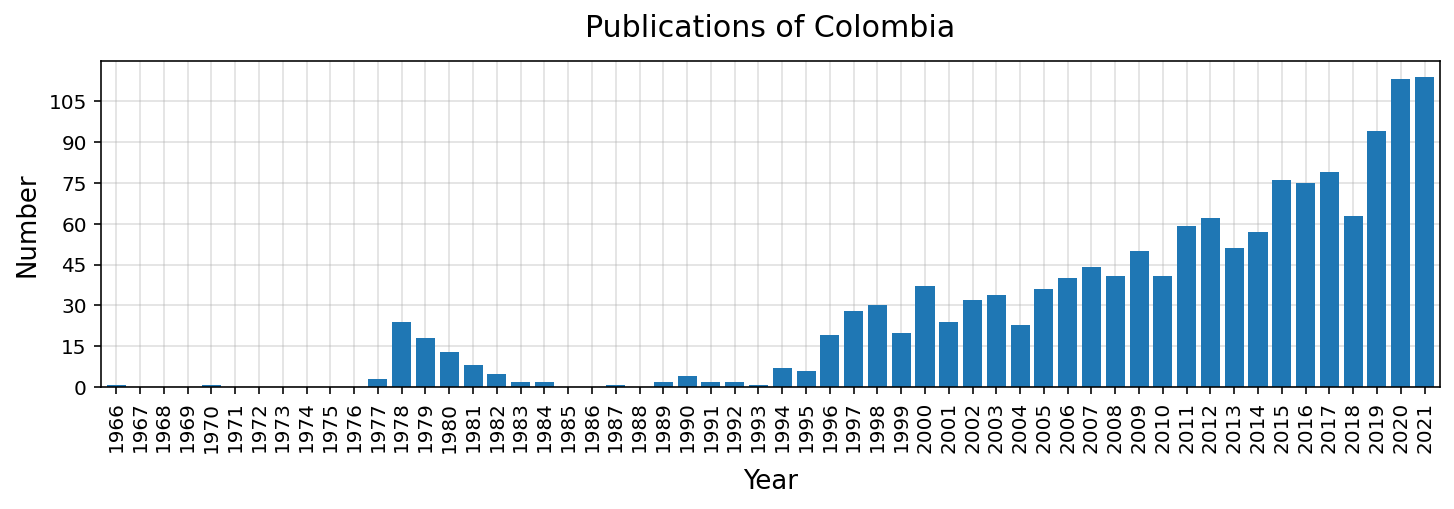

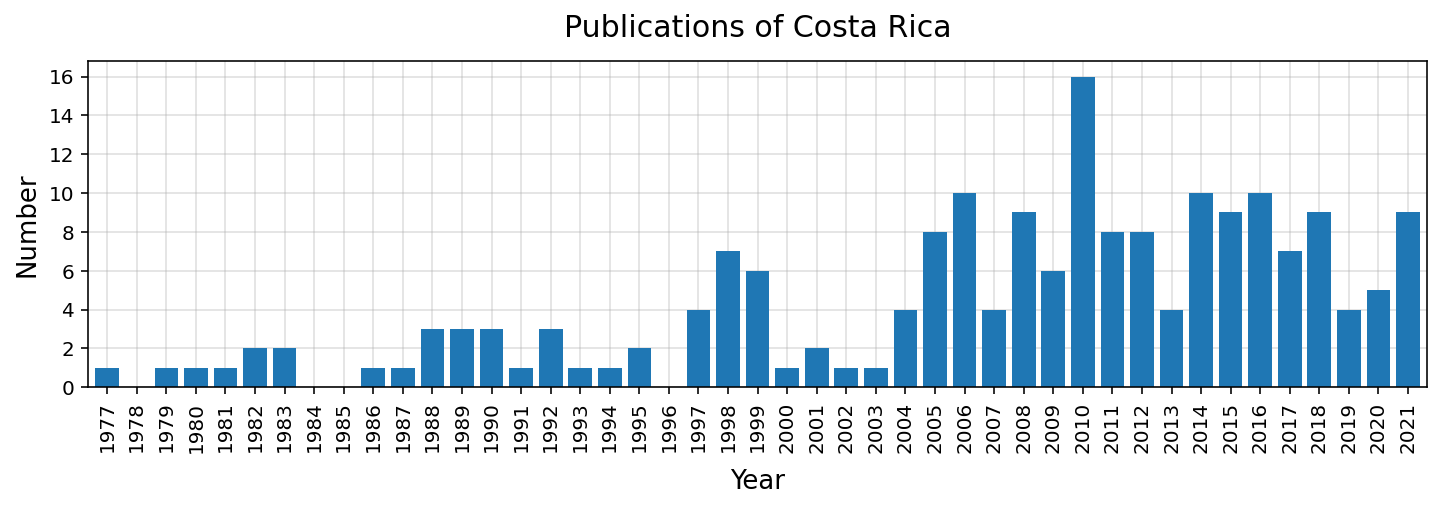

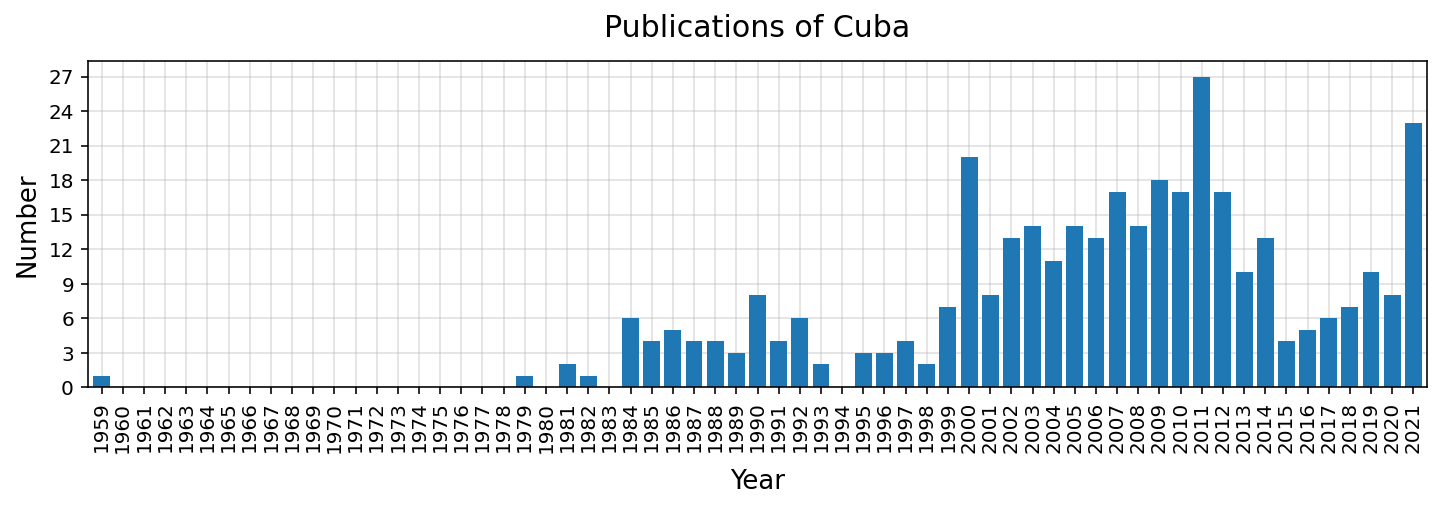

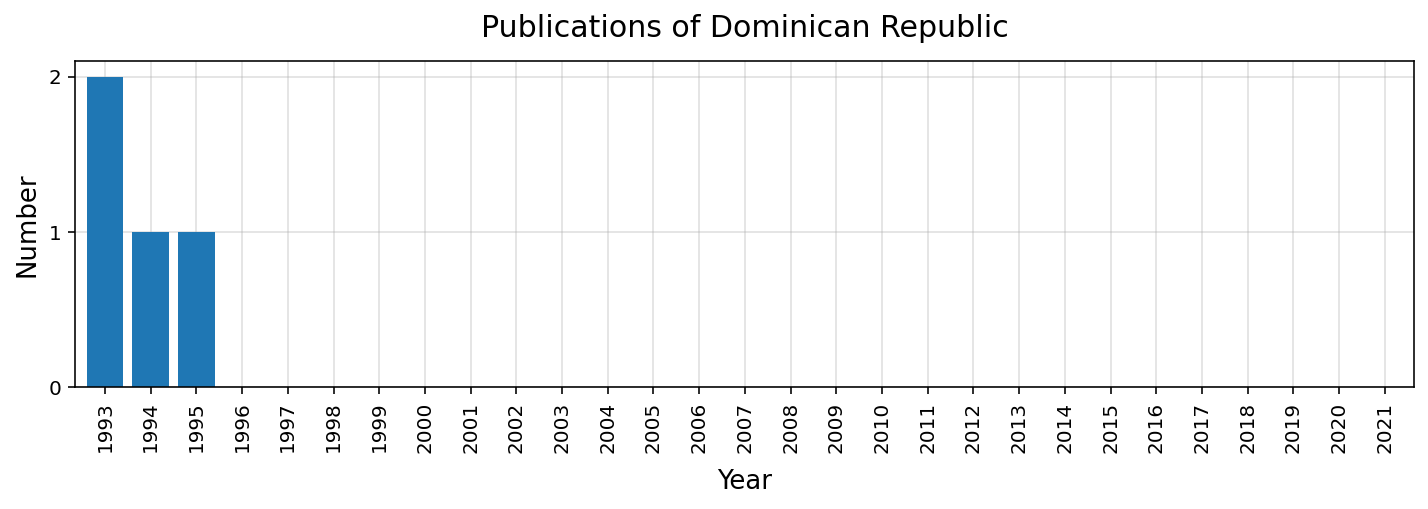

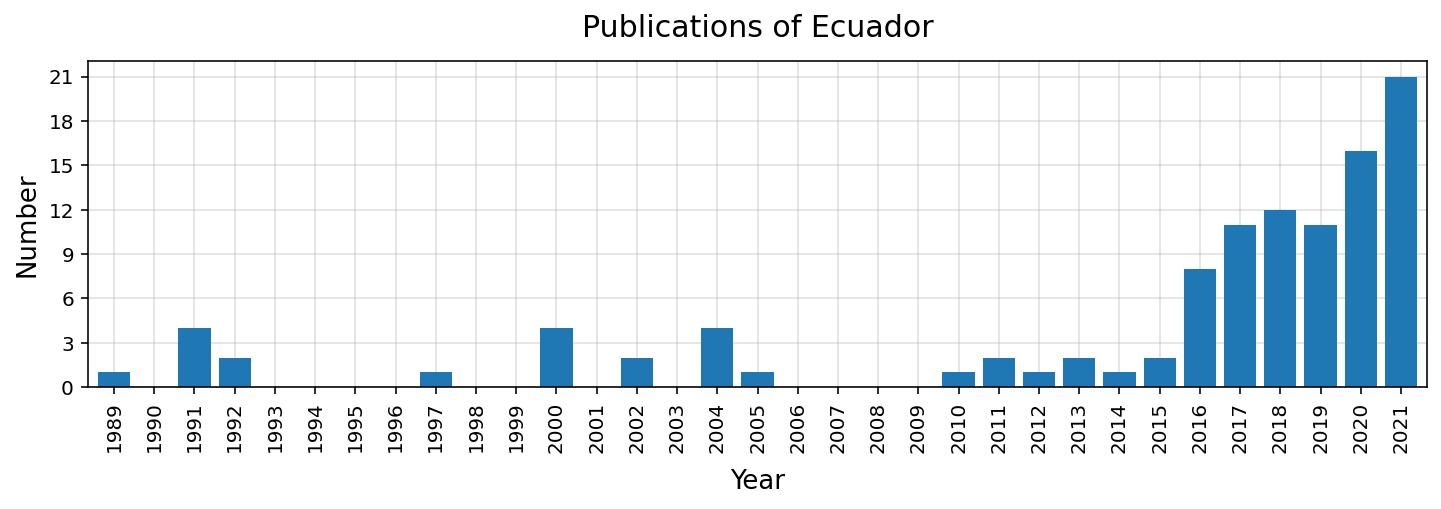

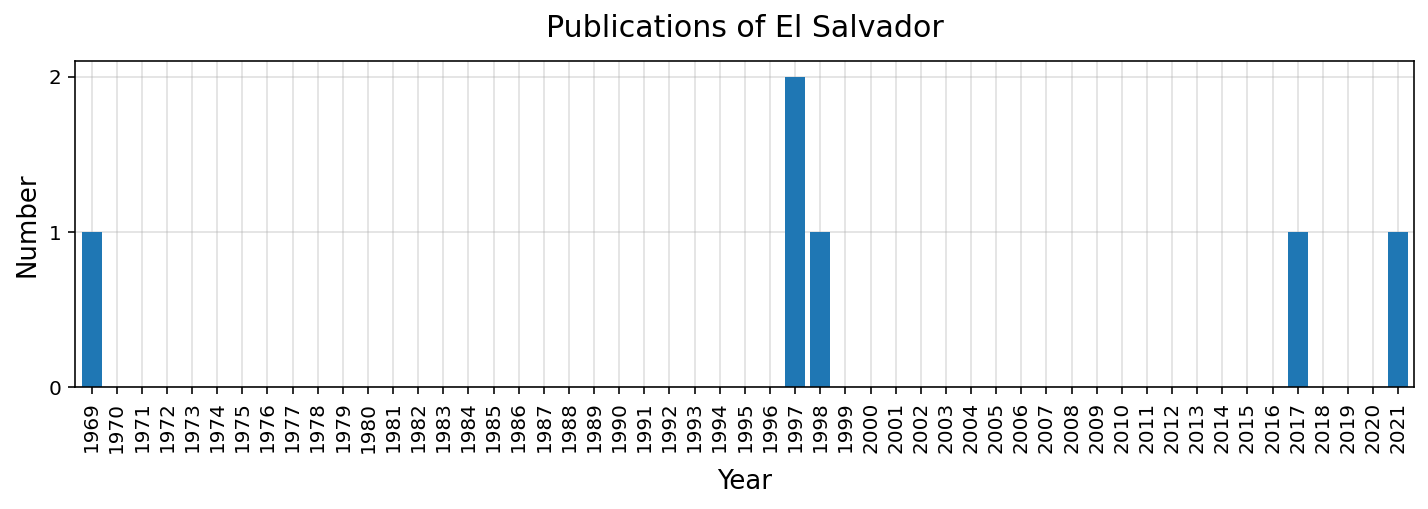

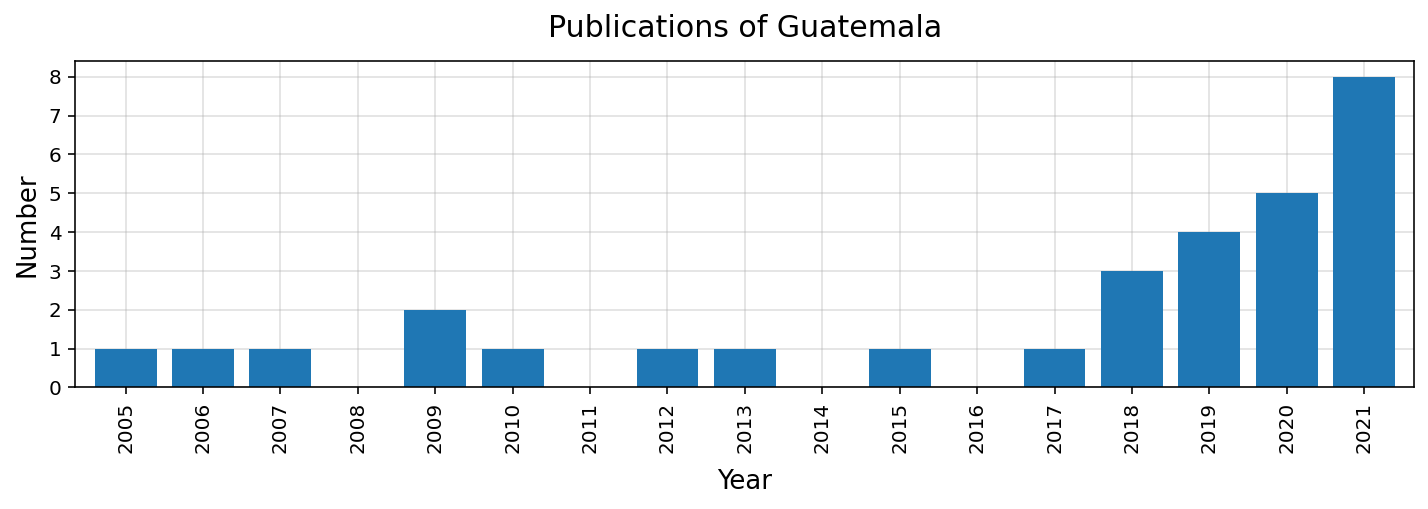

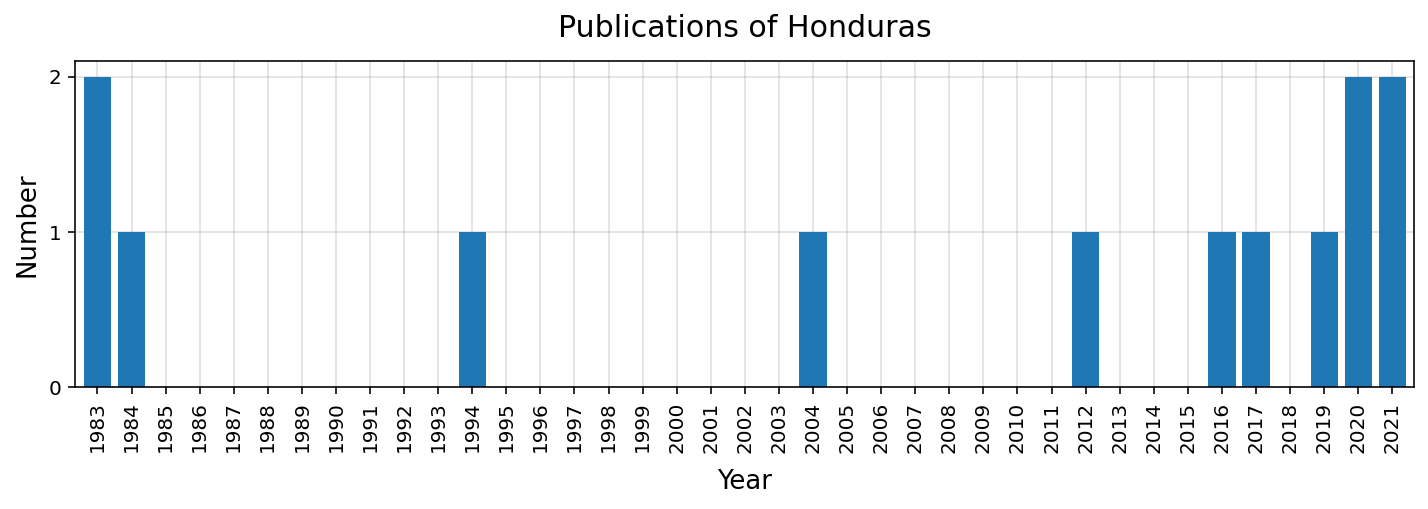

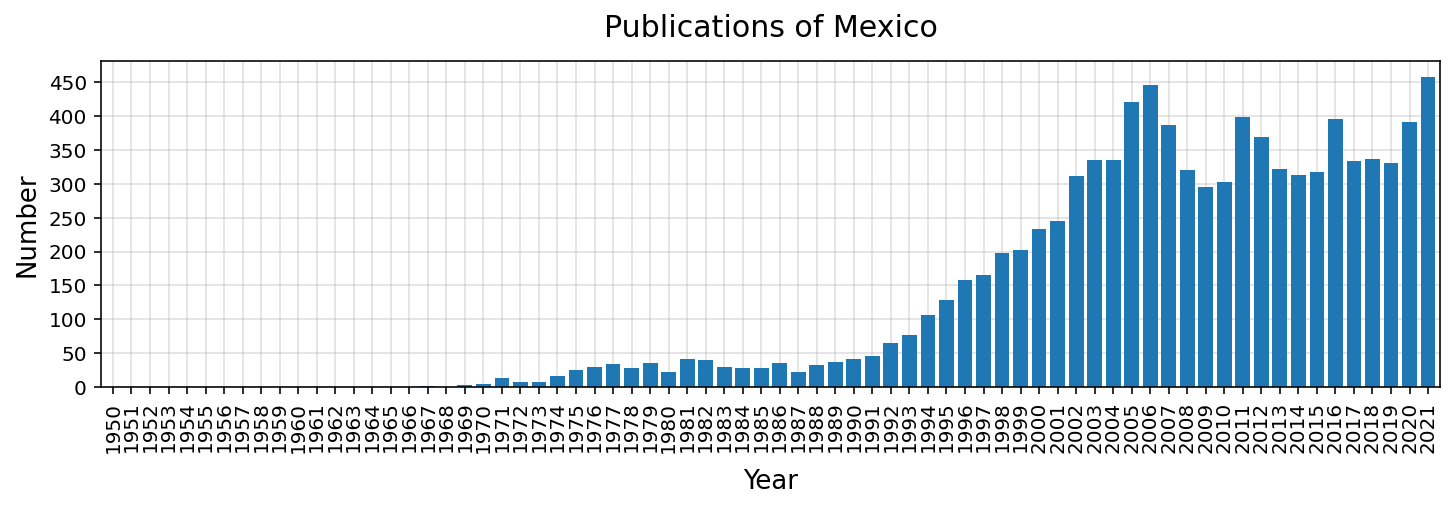

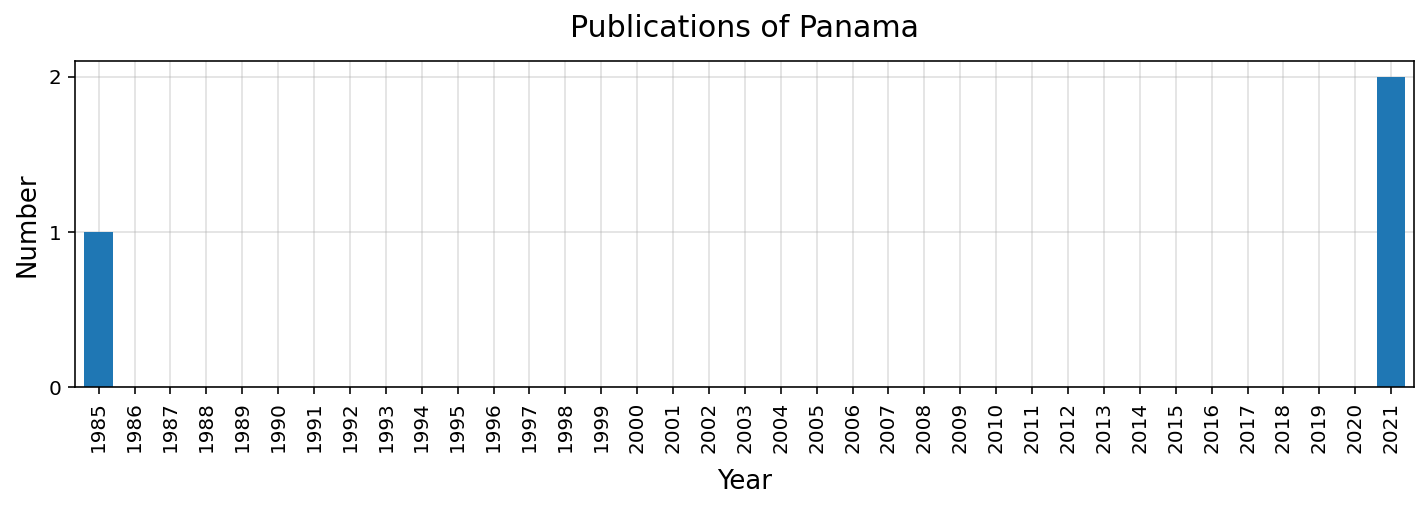

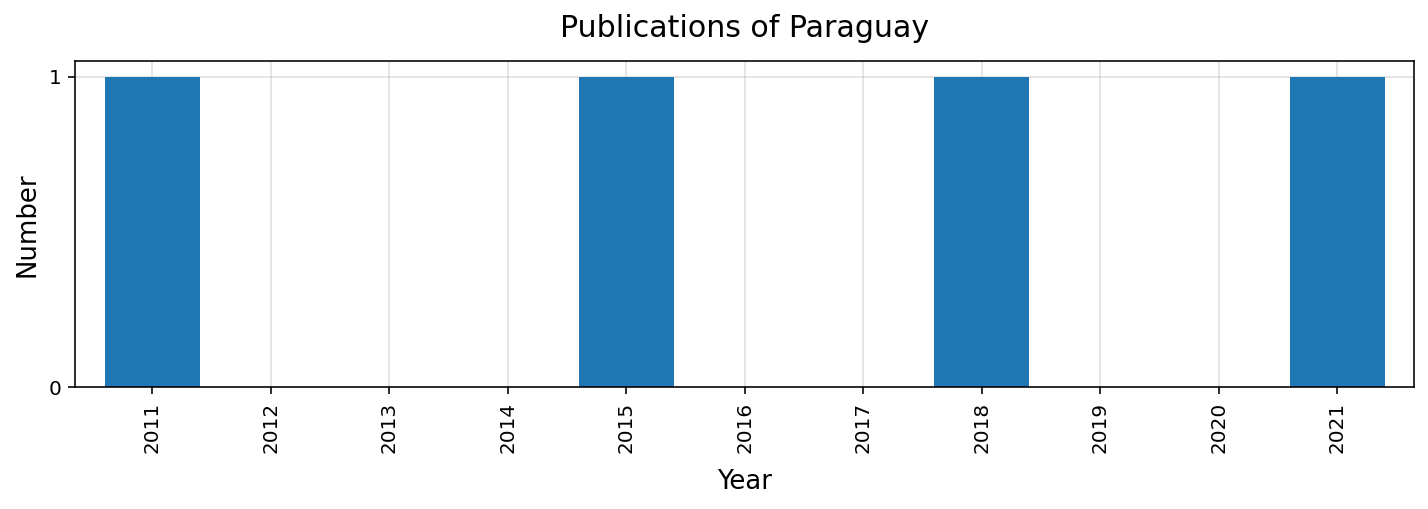

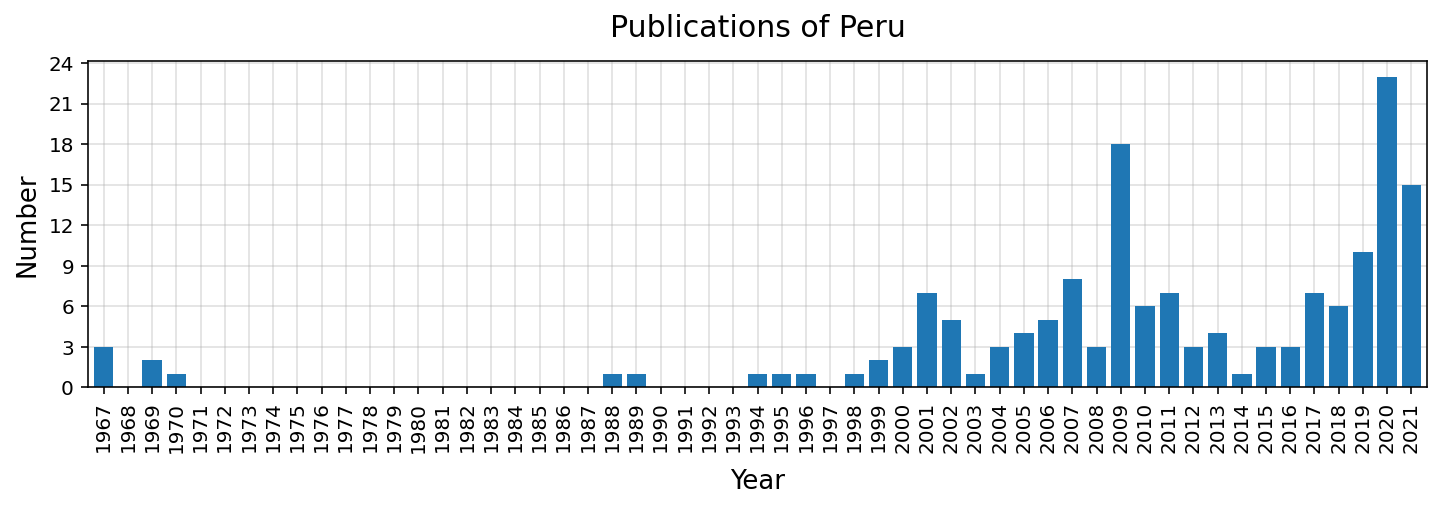

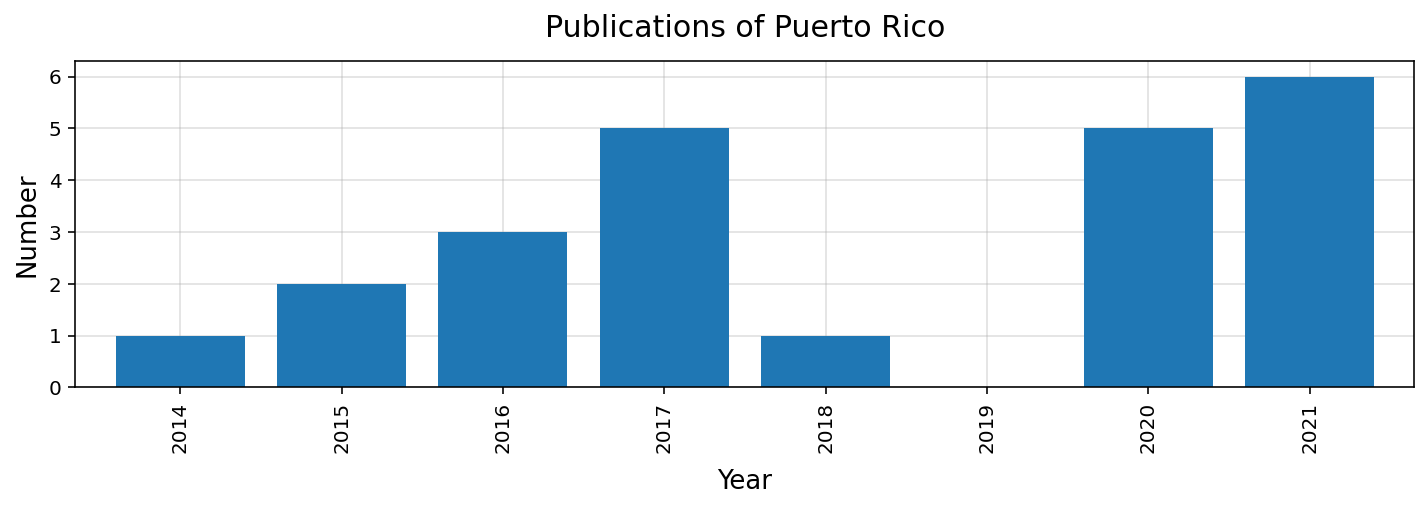

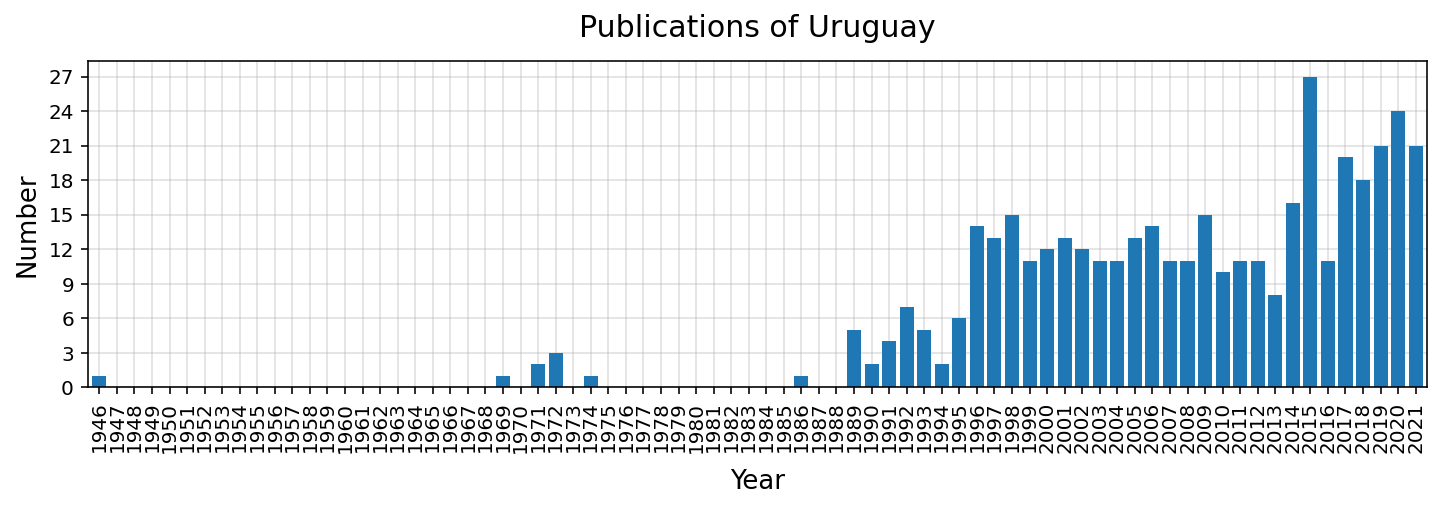

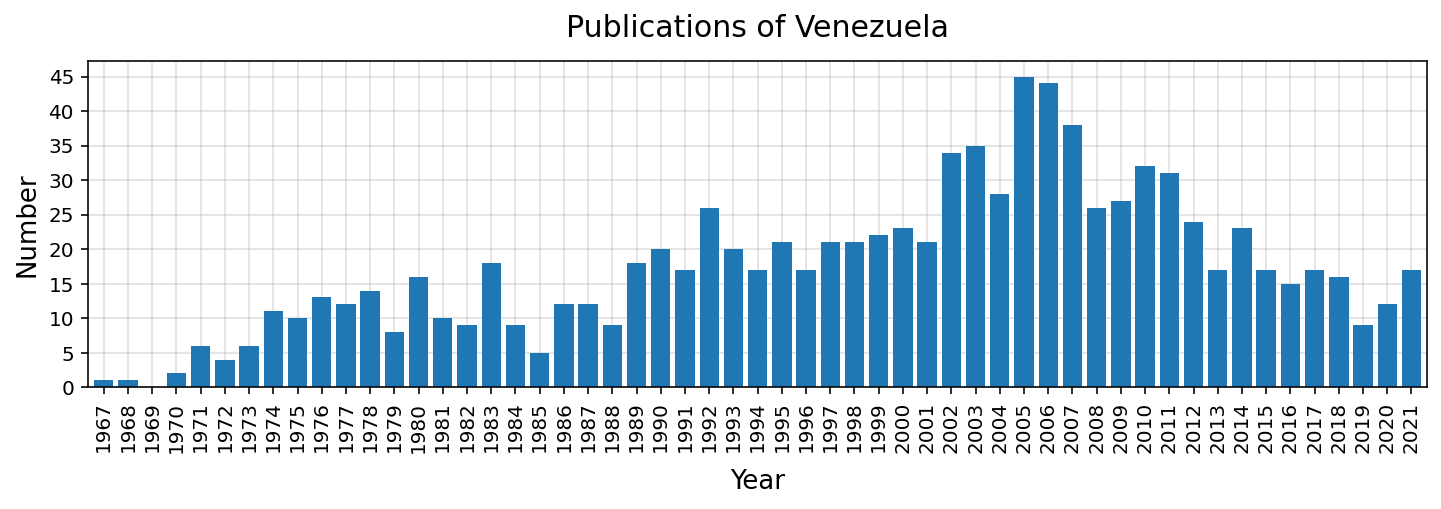

In [33]:
# Plot articles for all Latin America

for country in LA_countries:
    plot_articles_per_year(country)